In [1]:
import numpy as np
import tensorflow as tf
import time
import matplotlib.pyplot as plt

old_v = tf.logging.get_verbosity()
tf.logging.set_verbosity(tf.logging.ERROR)
from tensorflow.examples.tutorials.mnist import input_data
#get mnist data, with one_hot encoding
mnist = input_data.read_data_sets("MNIST_data/",one_hot=True)
#suppress warnings
tf.logging.set_verbosity(old_v)

#Initialize stuff
#learning rate
lr = 0.001
#number of traning steps
num_steps = 10

#network parameters
n_hidden_1 = 100
num_input = 784
num_classes = 10

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [42]:
#ReLU function
def ReLU(x):
    return np.maximum(0,x)

#softmax function
def softmax(x):
    #exponential
    max_value = np.max(x)
    expo = np.exp(x-max_value)
    return expo/expo.sum(axis = 0)


#PART B, forward propagation
#compute a layer
def forward_prop(x, W, B, act):
    z = np.dot(W,x) + B
    return act(z), z


#define the cost function
def cost(y, y_hat):
    log_cost =  -1 * np.multiply(np.log(y_hat), y)
    return np.squeeze(np.sum(log_cost))

#PART C and D, gradients and back propagation
#back propagation
def back_prop_soft(y, y_hat, w, x):
    m = x.shape[1]
    soft_grad = (y_hat - y)/m
    
    #calculate weight and bias gradients
    w_grad = np.dot(soft_grad, x.T)
    b_grad = np.sum(soft_grad, axis = 1, keepdims = True)

    #calculate x_gradient
    x_grad = np.dot(w.T, soft_grad)
    return w_grad, b_grad, x_grad

def back_prop_relu(x_grad, x, w, z1):
    n,m = x_grad.shape
    
    #apply relu gradient
    x_grad[z1 <= 0] = 0
    
    #calculate weight and bias gradients
    w_grad = np.dot(x_grad, x.T)
    b_grad = np.sum(x_grad, axis = 1, keepdims = True)

    return w_grad, b_grad

This is the current batch size: 16
--- 12.892510890960693 seconds ---
Test results
Accuracy: 0.8462
Loss: 2.1025310723297856
This is the current batch size: 64
--- 6.878605127334595 seconds ---
Test results
Accuracy: 0.7729
Loss: 4.566536767935653
This is the current batch size: 256
--- 8.544152736663818 seconds ---
Test results
Accuracy: 0.6391
Loss: 9.448887469199791
This is the current batch size: 1024
--- 7.823541641235352 seconds ---
Test results
Accuracy: 0.3204
Loss: 27.93201088128137


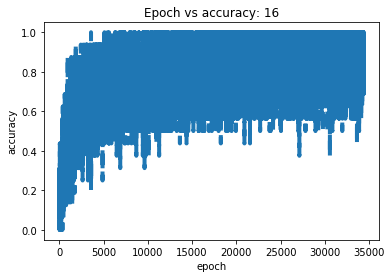

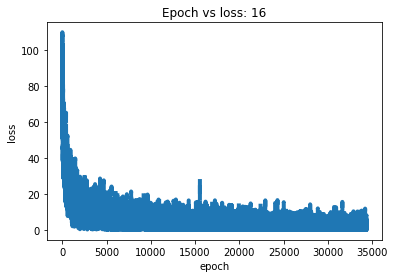

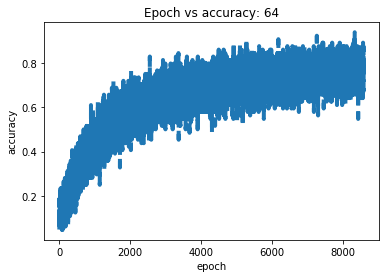

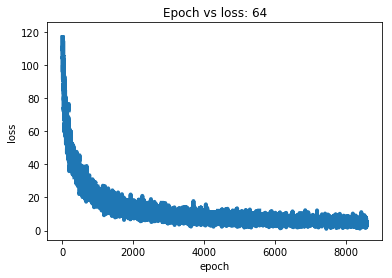

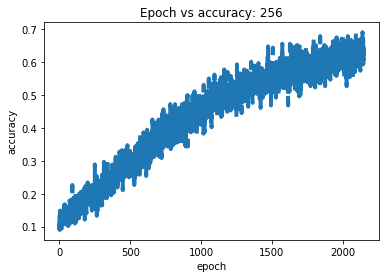

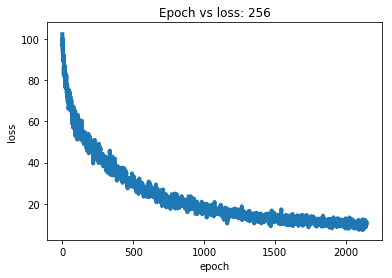

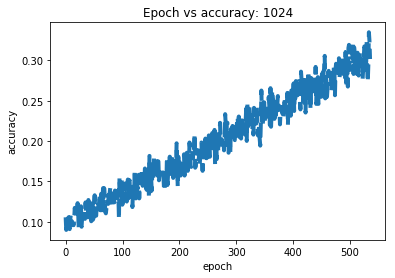

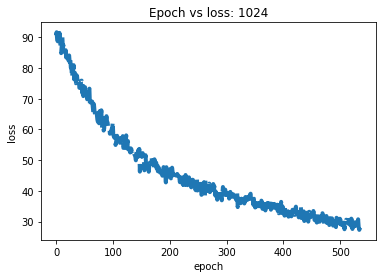

In [52]:
#loop with different batch sizes
batches = [16, 64, 256, 1024]
for which_batch in range(4):
    #PART A setup some parameters and activation functions
    batch_size = batches[which_batch]
    print("This is the current batch size:", batch_size)
    #Layers weight & bias
    w_1 = np.random.normal(0, 1, (n_hidden_1,num_input))
    #w_1 = w_1
    w_o = np.random.normal(0, 1, (num_classes,n_hidden_1))

    b_1 = np.random.normal(0, 1, (n_hidden_1,1))
    b_o = np.random.normal(0, 1, (num_classes,1))

    #training

    #plots
    losses = []
    accuracies = []
    steps = []
    num_steps = 10

    #Part E, training
    start_time = time.time()
    for i in range(0, num_steps):
        acc_sum = 0
        loss_sum = 0
        for k in range(0, int(55000/batch_size)):
            #get the next batch and reshape
            x, y = mnist.train.next_batch(batch_size)
            x = x.T
            y = y.T

            #forward propagation
            x1, z1 = forward_prop(x, w_1, b_1, ReLU)
            y_hat, z2 = forward_prop(x1, w_o, b_o, softmax)

            #accuracy test
            acc_sum = 0
            for j in range(batch_size):
                if np.argmax(y_hat[:,j])==np.argmax(y[:,j]):
                    acc_sum += 1

            loss_sum = cost(y, y_hat)
            #backward propagation
            wo_grad, bo_grad, xo_grad = back_prop_soft(y, y_hat, w_o, x1)

            w1_grad, b1_grad = back_prop_relu(xo_grad, x, w_1, z1)

            #update parameters
            w_1 = w_1 - w1_grad*lr
            w_o = w_o - wo_grad*lr
            b_1 = b_1 - b1_grad*lr
            b_o = b_o - bo_grad*lr

            steps.append(i* (55000/batch_size) + k)
            accuracies.append(acc_sum/(batch_size))
            losses.append(loss_sum/(batch_size))

        #print("Step: ", i)
        #print("Accuracy: ", acc_sum/(batch_size))
        #print("Loss: ", loss_sum/(batch_size))


    #testing
    acc_sum = 0
    loss_sum = 0
    X_test = mnist.test.images
    Y_test = mnist.test.labels
    print("--- %s seconds ---" % (time.time() - start_time))
    for j in range(10000):
        x = np.array([X_test[j]]).T
        y = np.array([Y_test[j]]).T
        xo_grad = 0

        #forward propagation
        x1, z1 = forward_prop(x, w_1, b_1, ReLU)
        y_hat, z2 = forward_prop(x1, w_o, b_o, softmax)

        #accuracy test
        if np.argmax(y_hat)==np.argmax(y):
                acc_sum += 1

        loss_sum += cost(y, y_hat)
    print("Test results")
    print("Accuracy:", acc_sum/10000)
    print("Loss:", loss_sum/10000)



    plt.figure()
    # plot epoch vs accuracy
    plt.plot(steps,accuracies,'--',lw=4)
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.title('Epoch vs accuracy: '+ str(batch_size))

    plt.figure()
    # plot epoch vs accuracy
    plt.plot(steps,losses,'--',lw=4)
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.title('Epoch vs loss: '+ str(batch_size))




From the results above we can see that the best performance in terms of testing accuracy was observed at a batch size of 16. It makes rough sense why the smallest batch size gave the best testing accuracy as I scaled the system so that each batch ran for the same number of epochs. This means that for larger batches there were overall fewer updates weight updates. As can be seen in the graphs while batch sizes of 16 and 64 seems to have stabilized at around 80% accuracy, batch sizes of 256 and 1024 were still improving and if left to run longer might have matched or even beat that. It is also worth noting that the large batch sizes have smoother accuracy improvements over the smaller batch sizes. 

This is the current batch size: 16
--- 39.084481716156006 seconds ---
Test results
Accuracy: 0.9346
Loss: 0.6452908044869169
This is the current batch size: 64
--- 12.61227297782898 seconds ---
Test results
Accuracy: 0.9242
Loss: 0.8653368783122009
This is the current batch size: 256
--- 9.939422607421875 seconds ---
Test results
Accuracy: 0.8957
Loss: 1.6476793481823702
This is the current batch size: 1024
--- 7.80612587928772 seconds ---
Test results
Accuracy: 0.8352
Loss: 4.018386018442681


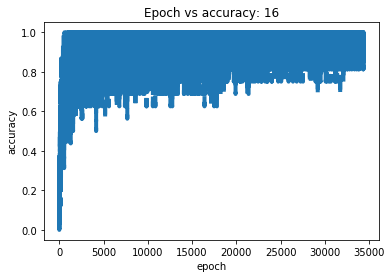

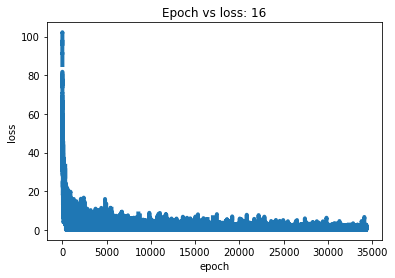

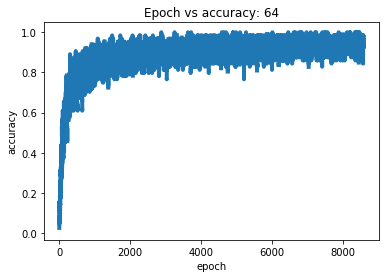

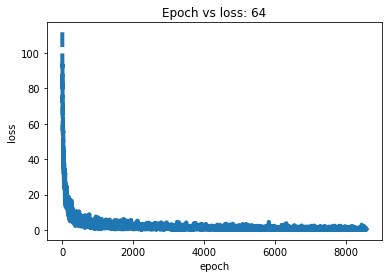

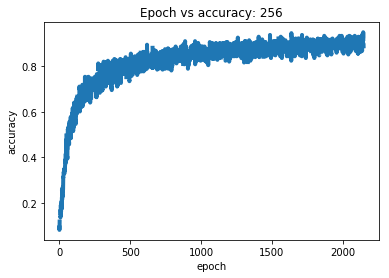

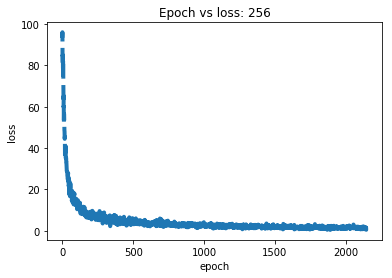

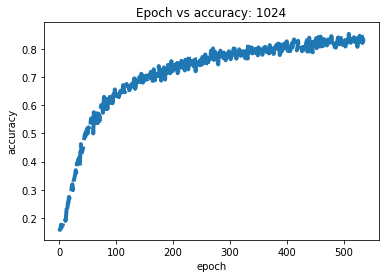

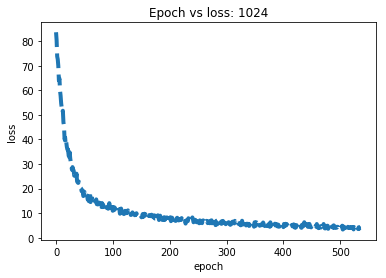

In [54]:
#loop with different batch sizes
batches = [16, 64, 256, 1024]
for which_batch in range(4):
    #PART A setup some parameters and activation functions
    batch_size = batches[which_batch]
    print("This is the current batch size:", batch_size)


    w_1 = np.random.normal(0, 1, (n_hidden_1,num_input))
    w_o = np.random.normal(0, 1, (num_classes,n_hidden_1))

    b_1 = np.random.normal(0, 1, (n_hidden_1,1))
    b_o = np.random.normal(0, 1, (num_classes,1))

    b1 = 0.9
    b2 = 0.99
    epsilon = 1E-8

    mk_wo = 0.
    vk_wo = 0.
    mk_bo = 0.
    vk_bo = 0.
    mk_w1 = 0.
    vk_w1 = 0.
    mk_b1 = 0.
    vk_b1 = 0.

    losses = []
    accuracies = []
    steps = []

    start_time = time.time()
    for i in range(0, num_steps):
        acc_sum = 0
        loss_sum = 0
        for k in range(0, int(55000/batch_size)):
            #get the next batch and reshape
            x, y = mnist.train.next_batch(batch_size)
            x = x.T
            y = y.T

            #forward propagation
            x1, z1 = forward_prop(x, w_1, b_1, ReLU)
            y_hat, z2 = forward_prop(x1, w_o, b_o, softmax)

            #accuracy test
            acc_sum = 0
            for j in range(batch_size):
                if np.argmax(y_hat[:,j])==np.argmax(y[:,j]):
                    acc_sum += 1

            loss_sum = cost(y, y_hat)
            #backward propagation
            wo_grad, bo_grad, xo_grad = back_prop_soft(y, y_hat, w_o, x1)

            w1_grad, b1_grad = back_prop_relu(xo_grad, x, w_1, z1)


            #update parameters
            w1_grad = (1./batch_size) * w1_grad
            mk_w1 = b1*mk_w1 + (1-b1)*w1_grad
            vk_w1 = b2*vk_w1 + (1-b2)*w1_grad*w1_grad
            mk_hat = mk_w1 /(1 - np.power(b1,i+1))
            vk_hat = vk_w1 /(1 - np.power(b2,i+1))

            w_final = mk_hat / (np.sqrt(vk_hat) + epsilon)
            w_1 = w_1 - w_final * lr


            #weights output
            wo_grad = (1./batch_size) * wo_grad
            mk_wo = b1*mk_wo + (1-b1)*wo_grad
            vk_wo = b2*vk_wo + (1-b2)*wo_grad*wo_grad

            mk_hat = mk_wo /(1 - np.power(b1,i+1))
            vk_hat = vk_wo /(1 - np.power(b2,i+1))

            w_final = mk_hat / (np.sqrt(vk_hat) + epsilon)
            w_o = w_o - w_final * lr


            #bias hl1
            b1_grad = (1./batch_size) * b1_grad
            mk_b1 = b1*mk_b1 + (1-b1)*b1_grad
            vk_b1 = b2*vk_b1 + (1-b2)*b1_grad*b1_grad

            mk_hat = mk_b1 /(1 - np.power(b1,i+1))
            vk_hat = vk_b1 /(1 - np.power(b2,i+1))

            w_final = mk_hat / (np.sqrt(vk_hat) + epsilon)
            b_1 = b_1 - w_final * lr


            #bias output
            bo_grad = (1./batch_size) * bo_grad
            mk_bo = b1*mk_bo + (1-b1)*bo_grad
            vk_bo = b2*vk_bo + (1-b2)*bo_grad*bo_grad

            mk_hat = mk_bo /(1 - np.power(b1,i+1))
            vk_hat = vk_bo /(1 - np.power(b2,i+1))

            w_final = mk_hat / (np.sqrt(vk_hat) + epsilon)
            b_o = b_o - w_final * lr

            steps.append(i* (55000/batch_size) + k)
            accuracies.append(acc_sum/(batch_size))
            losses.append(loss_sum/batch_size)

        #print(i)
        #print(acc_sum/(batch_size))


    #testing
    acc_sum = 0
    loss_sum = 0
    X_test = mnist.test.images
    Y_test = mnist.test.labels
    print("--- %s seconds ---" % (time.time() - start_time))
    for j in range(10000):
        x = np.array([X_test[j]]).T
        y = np.array([Y_test[j]]).T
        xo_grad = 0

        #forward propagation
        x1, z1 = forward_prop(x, w_1, b_1, ReLU)
        y_hat, z2 = forward_prop(x1, w_o, b_o, softmax)

        #accuracy test
        if np.argmax(y_hat)==np.argmax(y):
                acc_sum += 1

        loss_sum += cost(y, y_hat)
    print("Test results")
    print("Accuracy:", acc_sum/10000)
    print("Loss:", loss_sum/10000)



    plt.figure()
    # plot epoch vs accuracy
    plt.plot(steps,accuracies,'--',lw=4)
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.title('Epoch vs accuracy: '+ str(batch_size))

    plt.figure()
    # plot epoch vs accuracy
    plt.plot(steps,losses,'--',lw=4)
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.title('Epoch vs loss: '+ str(batch_size))

Comparing with the gradient descent method, adam achieves much better training in all cases though we still see the pattern  of smaller batches achieving higher overall testing accuracy. 

This is the current batch size: 16
Instructions for updating:
Use keras.layers.dense instead.
Instructions for updating:
Colocations handled automatically by placer.
Training finished!
--- 63.47819662094116 seconds ---
Testing Accuracy: 0.8465
This is the current batch size: 64
Training finished!
--- 16.474887132644653 seconds ---
Testing Accuracy: 0.7659
This is the current batch size: 256
Training finished!
--- 5.651943206787109 seconds ---
Testing Accuracy: 0.6407
This is the current batch size: 1024
Training finished!
--- 2.912212610244751 seconds ---
Testing Accuracy: 0.2889


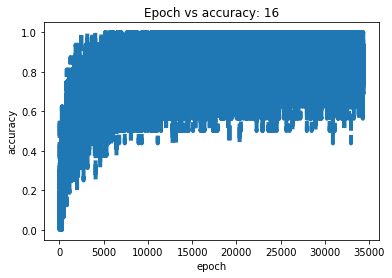

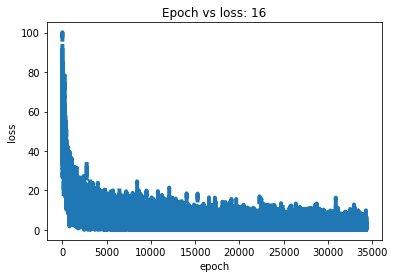

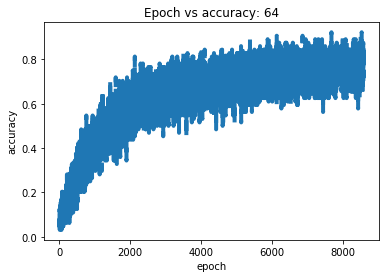

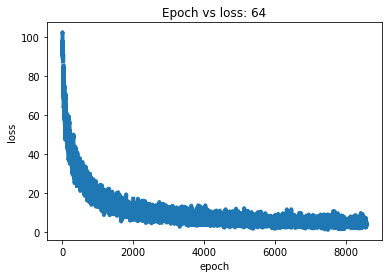

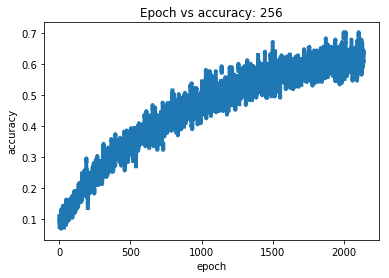

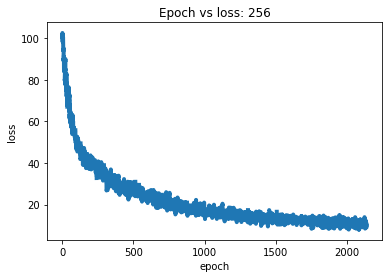

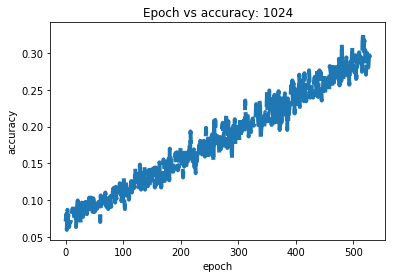

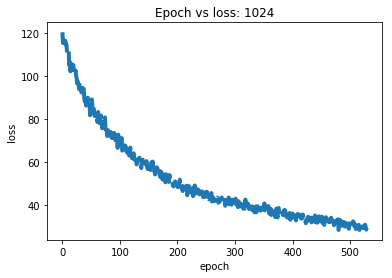

In [55]:
#PART G, compare with tensorflow
batches = [16, 64, 256, 1024]
for which_batch in range(4):
    batch_size = batches[which_batch]
    print("This is the current batch size:", batch_size)
    tf.reset_default_graph()


    #tf graph input
    X = tf.placeholder(tf.float32,[None,num_input],name='X')
    Y = tf.placeholder(tf.int32,[None,num_classes],name='Y')

    def neural_net(x):
        layer_1 = tf.layers.dense(x,n_hidden_1, activation=tf.nn.relu, kernel_initializer = tf.random_normal_initializer())
        out = tf.layers.dense(layer_1,num_classes, activation=None, kernel_initializer = tf.random_normal_initializer())
        return out

    #predicted labels
    logits = neural_net(X)

    #define loss
    loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=logits,labels=Y),name='loss')
    #define optimizer
    optimizer = tf.train.GradientDescentOptimizer(learning_rate=lr)
    train_op = optimizer.minimize(loss)

    #compare the predicted labels with true labels
    correct_pred = tf.equal(tf.argmax(logits,1),tf.argmax(Y,1))

    #compute the accuracy by taking average
    accuracy = tf.reduce_mean(tf.cast(correct_pred,tf.float32),name='accuracy')

    #Initialize the variables
    init = tf.global_variables_initializer()
    #num_steps = 10
    losses = []
    accuracies = []
    steps = []

    with tf.Session() as sess:
        sess.run(init)
        start_time = time.time()
        for i in range(num_steps * int(55000/batch_size)):
            #fetch batch
            batch_x, batch_y = mnist.train.next_batch(batch_size)
            #run optimization
            sess.run(train_op, feed_dict={X:batch_x, Y:batch_y})
            acc,the_cost = sess.run((accuracy,loss),feed_dict={X:batch_x, Y:batch_y})

            steps.append(i)
            accuracies.append(acc)
            losses.append(the_cost)

            #if i % (num_steps / 25) ==0:  
            #    print("step "+str(i)+", Accuracy= {:.3f}".format(acc))

        print("Training finished!")
        print("--- %s seconds ---" % (time.time() - start_time))
        print("Testing Accuracy:", sess.run(accuracy, feed_dict={X:mnist.test.images, Y:mnist.test.labels}))

    plt.figure()
    # plot epoch vs accuracy
    plt.plot(steps,accuracies,'--',lw=4)
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.title('Epoch vs accuracy: '+ str(batch_size))

    plt.figure()
    # plot epoch vs accuracy
    plt.plot(steps,losses,'--',lw=4)
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.title('Epoch vs loss: ' + str(batch_size))

In terms of accuracy tensorflow seems to be achieving similar accuracies to what I say in my numpy methods. This makes sense as they should both be doing the same mathematical operations. In terms of timing tensorflow does worse for small batches but better for large batches. I suspect the reason the first timing measurement is so poor is because tensorflow likely has a fair bit of prep work to get the tensorflow model setup and run. The large batches size running faster makes sense as tensorflow can leverage the GPU to efficient handle all the parallel computations. 

This is the current batch size: 16
Instructions for updating:
Use keras.layers.dense instead.
Instructions for updating:
Colocations handled automatically by placer.
Training finished!
--- 66.0613157749176 seconds ---
Testing Accuracy: 0.9496
This is the current batch size: 64
Training finished!
--- 17.208953857421875 seconds ---
Testing Accuracy: 0.9338
This is the current batch size: 256
Training finished!
--- 5.704362154006958 seconds ---
Testing Accuracy: 0.8984
This is the current batch size: 1024
Training finished!
--- 3.149883270263672 seconds ---
Testing Accuracy: 0.8442


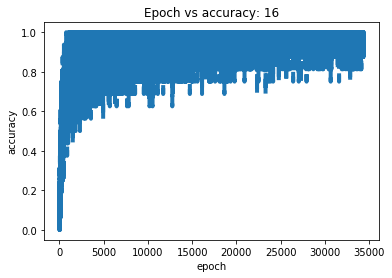

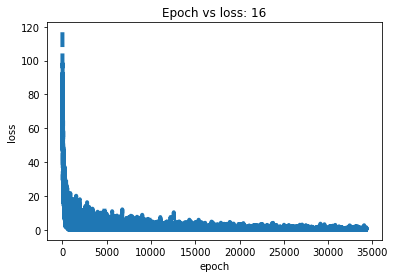

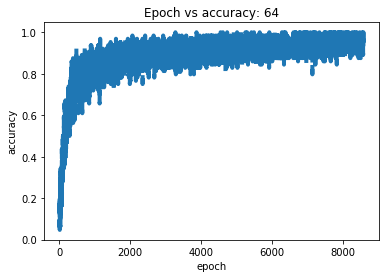

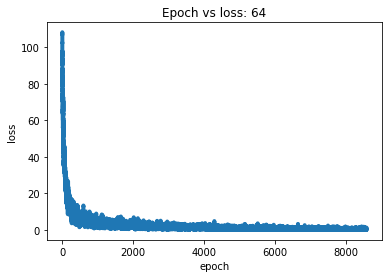

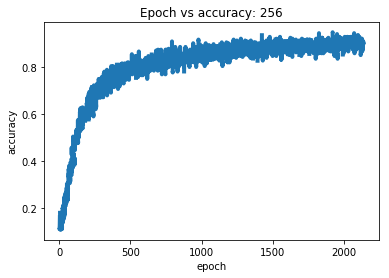

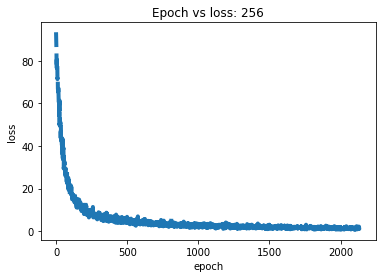

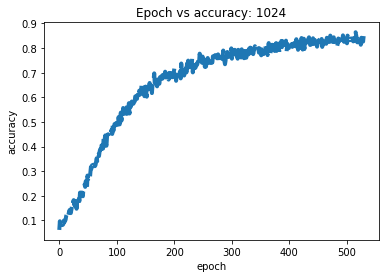

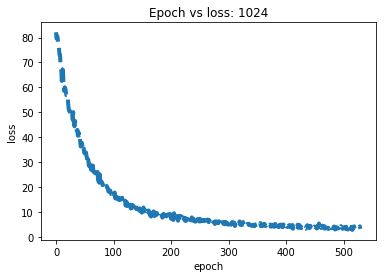

In [2]:
batches = [16, 64, 256, 1024]
for which_batch in range(4):
    batch_size = batches[which_batch]
    print("This is the current batch size:", batch_size)
    tf.reset_default_graph()


    #tf graph input
    X = tf.placeholder(tf.float32,[None,num_input],name='X')
    Y = tf.placeholder(tf.int32,[None,num_classes],name='Y')

    def neural_net(x):
        layer_1 = tf.layers.dense(x,n_hidden_1, activation=tf.nn.relu, kernel_initializer = tf.random_normal_initializer())
        out = tf.layers.dense(layer_1,num_classes, activation=None, kernel_initializer = tf.random_normal_initializer())
        return out

    #predicted labels
    logits = neural_net(X)

    #define loss
    loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=logits,labels=Y),name='loss')
    #define optimizer
    optimizer = tf.train.AdamOptimizer(learning_rate=lr)
    train_op = optimizer.minimize(loss)

    #compare the predicted labels with true labels
    correct_pred = tf.equal(tf.argmax(logits,1),tf.argmax(Y,1))

    #compute the accuracy by taking average
    accuracy = tf.reduce_mean(tf.cast(correct_pred,tf.float32),name='accuracy')

    #Initialize the variables
    init = tf.global_variables_initializer()
    #num_steps = 10
    losses = []
    accuracies = []
    steps = []

    with tf.Session() as sess:
        sess.run(init)
        start_time = time.time()
        for i in range(num_steps * int(55000/batch_size)):
            #fetch batch
            batch_x, batch_y = mnist.train.next_batch(batch_size)
            #run optimization
            sess.run(train_op, feed_dict={X:batch_x, Y:batch_y})
            acc,the_cost = sess.run((accuracy,loss),feed_dict={X:batch_x, Y:batch_y})

            steps.append(i)
            accuracies.append(acc)
            losses.append(the_cost)

            #if i % (num_steps / 25) ==0:  
            #    print("step "+str(i)+", Accuracy= {:.3f}".format(acc))

        print("Training finished!")
        print("--- %s seconds ---" % (time.time() - start_time))
        print("Testing Accuracy:", sess.run(accuracy, feed_dict={X:mnist.test.images, Y:mnist.test.labels}))

    plt.figure()
    # plot epoch vs accuracy
    plt.plot(steps,accuracies,'--',lw=4)
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.title('Epoch vs accuracy: '+ str(batch_size))

    plt.figure()
    # plot epoch vs accuracy
    plt.plot(steps,losses,'--',lw=4)
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.title('Epoch vs loss: ' + str(batch_size))

For ADAM I am seeing the same relations between my numpy and tensorflow that I saw with the gradient descent method.  